In [1]:
import pandas as pd
import numpy as np
import ast

import matplotlib.pyplot as plt

### Importing Data

In [2]:
folder = 'C:/Users/oryan/Documents/mergers-in-cosmos'
res_fold = f'{folder}/results'
data_fold = f'{folder}/data'

In [3]:
n_neighbour = pd.read_csv(f'{res_fold}/nearest-neighbours-corr-sample.csv', index_col = 0)

In [4]:
n_neighbour.head()

,index,IDs,separations,N_1,N_2,N_3,N_4,N_5
0,6000534883051,"[692814, 687870, 747469, 737019, 683089]","[0.6236561709331763, 0.6715843835447213, 0.758...",0.818389,1.705747,2.553618,3.479039,4.425517
1,6000534883422,"[733042, 726581, 752574, 752669, 763999]","[0.2951411361924966, 0.31058949037764166, 0.34...",3.654186,4.299716,4.638929,5.523387,6.008943
2,6000534884369,"[821176, 838185, 818008, 846121, 815527]","[0.17313672328295357, 0.17426398202835064, 0.2...",10.618709,11.481776,9.596135,6.023128,5.915822
3,6000535008523,"[1015737, 1010878, 990161, 1026898, 990592]","[0.03990060995032439, 0.23753658032854316, 0.2...",199.936027,6.641429,6.890354,7.005301,7.229884
4,6000535064806,"[1026721, 1055516, 1038037, 996612, 992724]","[0.6242762467228179, 1.1249620013949815, 1.186...",0.816764,1.251521,2.225972,3.171132,4.087778


In [23]:
n_neighbour.separations.iloc[0]

'[0.6236561709331763, 0.6715843835447213, 0.7582628704926255, 0.8151540158951343, 0.8649011518390204]'

In [5]:
df_sfr = pd.read_csv(f'{res_fold}/sfr-cat-2020-match.csv', index_col = 0)

In [6]:
df_cat = pd.read_csv(f'{data_fold}/categorised_sources.csv', index_col = 0)[['SourceID', 'category']]

### Setting Up DataFrames

In [7]:
df_sfr_cat = df_sfr.merge(df_cat, on = 'SourceID', how = 'left')

In [8]:
df_neighbours = n_neighbour[['index', 'separations', 'N_4', 'N_5']].rename(columns = {'index': 'SourceID'})

In [9]:
len(df_neighbours)

3568

In [10]:
df_merg = df_neighbours.merge(df_sfr_cat, on = 'SourceID', how = 'left').dropna()

### Calculating Distance Parameter

In [11]:
df_tmp = df_merg.assign(sep = df_merg.separations.apply(lambda x: ast.literal_eval(x)[0]))

In [12]:
df_merg_red = df_tmp.query('sep < 0.5')

In [41]:
df_environ = (
    df_merg
    .assign(log_N5 = df_merg.N_5.apply(lambda x: np.log10(x)))
    .assign(log_N4 = df_merg.N_4.apply(lambda x: np.log10(x)))
)

In [43]:
df_sigma = (
    df_environ
    .assign(sigma = df_environ.apply(lambda row: 10**((row.log_N5 + row.log_N4) / 2), axis = 1))
)

In [44]:
df_sigma.sigma.min()

3.498681174701157

In [45]:
df_sigma.sigma.max()

155.57799599909606

In [47]:
df_sigma.sigma.mean()

6.381516733513119

In [48]:
df_fin = df_sigma.assign(log_sigma = df_sigma.sigma.apply(lambda x: np.log10(x)))

In [49]:
df_fin.log_sigma.min()

0.5439043682111963

In [50]:
df_fin.log_sigma.max()

2.191948173039744

In [53]:
df_fin.query('sigma > 40')

,SourceID,separations,N_4,N_5,lp_mass_best_1,lp_mass_best_2,ez_z_phot_1,ez_z_phot_2,log_sfr_tot_1,log_sfr_tot_2,category,log_N5,log_N4,sigma,log_sigma
15,6000535066203,"[0.019844461126741195, 0.023362929413477226, 0...",108.045960,20.511823,10.01216,8.76195,0.224603,0.223176,1.082029,-0.103044,stage4,1.312004,2.033609,47.076742,1.672806
205,4001006888555,"[0.028520763584245316, 0.030056560079582382, 0...",77.431125,40.516796,8.04094,8.07553,0.091862,0.091818,-1.719497,-4.071341,stage2,1.607635,1.888916,56.011259,1.748275
254,4001018649503,"[0.024329666027037806, 0.02556152648085901, 0....",239.668130,55.138088,10.00361,8.22752,0.092006,0.091999,-1.528137,-3.450489,stage1,1.741452,2.379610,114.955829,2.060531
696,4000909656500,"[0.011779365787457552, 0.04380403362900405, 0....",54.342357,53.974260,7.51181,7.82733,0.094620,0.095797,-1.446624,-1.346735,stage3,1.732187,1.735138,54.157996,1.733663
939,4000953982113,"[0.030643427726147837, 0.04538066658656438, 0....",109.297532,53.654011,8.53888,8.19629,0.063549,0.059284,-1.846129,-2.558917,stage2,1.729602,2.038610,76.578398,1.884106
983,4000966594395,"[0.039233515738879815, 0.051098962581686495, 0...",67.373919,43.371281,8.22716,7.93666,0.291988,0.290886,-2.964336,-1.472300,stage2,1.637202,1.828492,54.056389,1.732847
986,4000966928877,"[0.02625424947457571, 0.053906279039289344, 0....",56.934663,44.766927,9.56573,8.25935,0.092349,0.091791,-1.060486,-2.607498,stage2,1.650957,1.755377,50.485541,1.703167
1070,4000780460802,"[0.010537767020550681, 0.014411353050202504, 0...",52.433143,46.777048,8.29517,8.23357,0.409573,0.409362,-0.129368,-0.487679,stage1,1.670033,1.719606,49.524415,1.694819
1073,4000780461300,"[0.04049751360931756, 0.05631631684980707, 0.0...",93.787194,74.465697,6.28336,6.90059,0.049862,0.058065,-1.655151,-3.521064,stage2,1.871956,1.972144,83.569904,1.922050
1110,4000786845693,"[0.04802383102583099, 0.05393288609509653, 0.0...",46.736867,36.522780,9.58084,8.42064,0.093604,0.091900,-1.247780,-2.507288,stage4,1.562564,1.669660,41.315376,1.616112


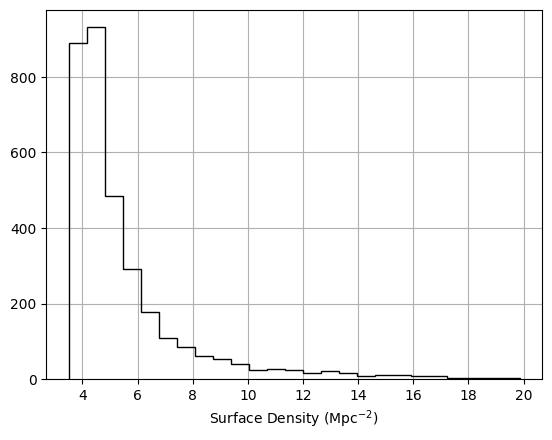

In [61]:
df_fin.query('sigma < 20').hist(
    column = 'sigma',
    bins = 25,
    histtype = 'step',
    color = 'black'
)
plt.xlabel('Surface Density (Mpc$^{-2}$)')
plt.title('')
plt.show()

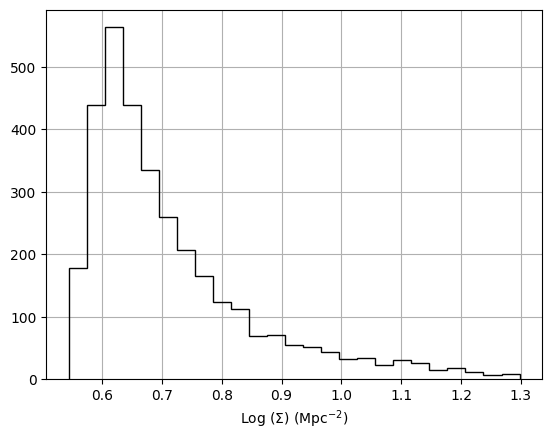

In [62]:
df_fin.query('sigma < 20').hist(
    column = 'log_sigma',
    bins = 25,
    histtype = 'step',
    color = 'black'
)
plt.xlabel('Log ($\Sigma$) (Mpc$^{-2}$)')
plt.title('')
plt.show()

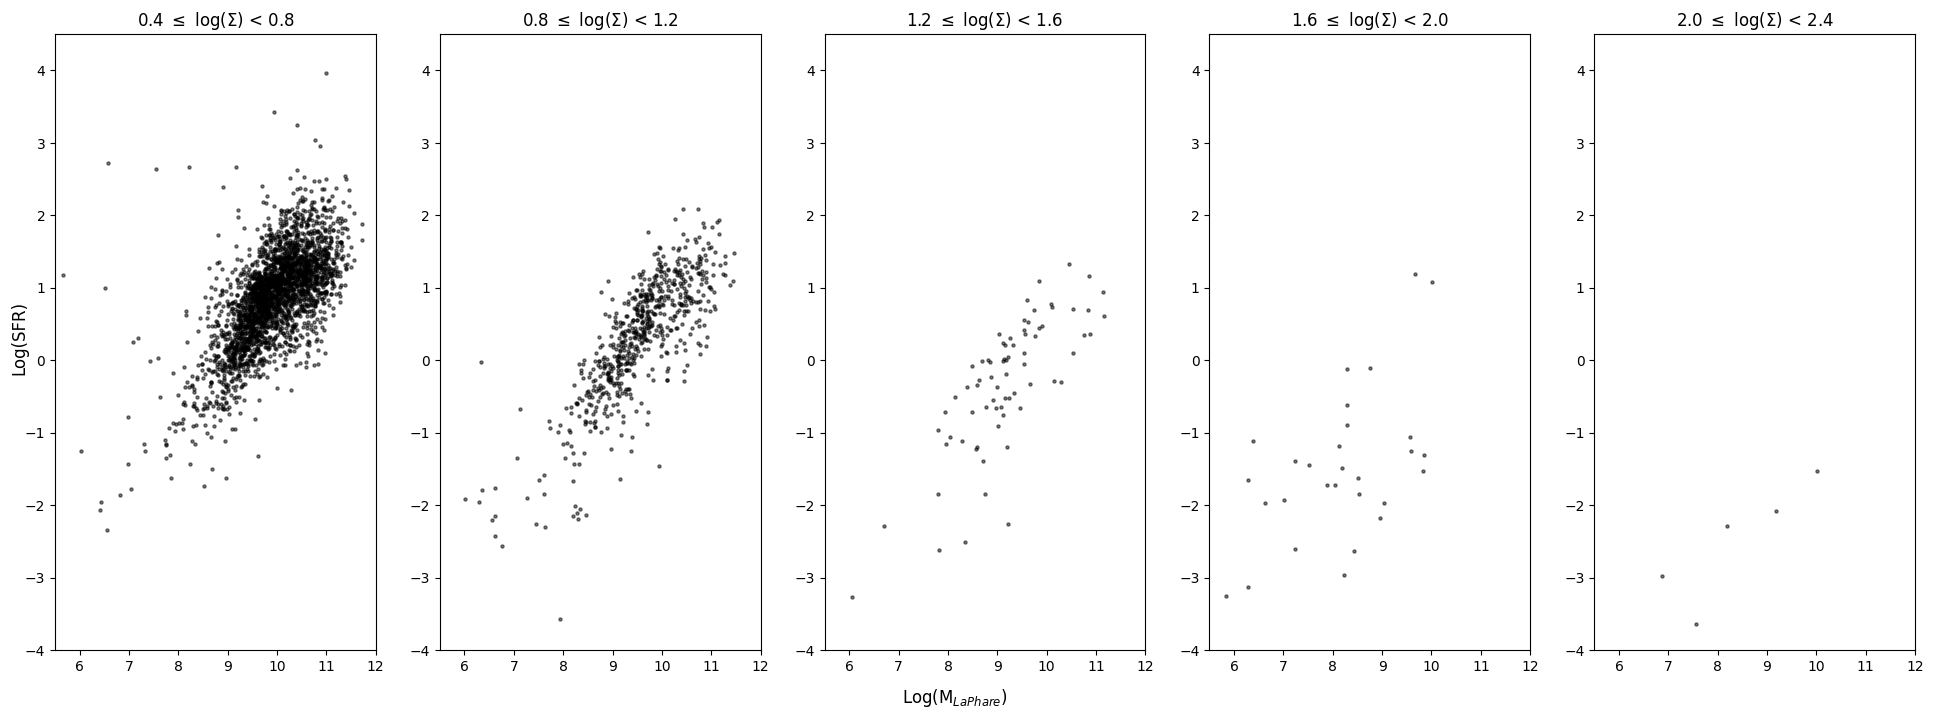

In [32]:
bins = [0.4, 0.8, 1.2, 1.6, 2.0, 2.4]
fig, ax = plt.subplots(ncols = len(bins) - 1, figsize = (24,8))
for i in range(len(bins) - 1):
    
    df_tmp = df_environ.query('log_sigma >= @bins[@i] and log_sigma < @bins[@i+1]')
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_1',
            y = 'log_sfr_tot_1',
            title = f'{bins[i]} $\leq$ log($\Sigma$) < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [-4, 4.5],
            xlabel = '',
            ylabel = '',
            color = 'black',
            s = 5,
            alpha = 0.5
        )

fig.text(0.5, 0.05, 'Log(M$_{LaPhare}$)', ha='center', va='center', fontsize = 12)
fig.text(0.11, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

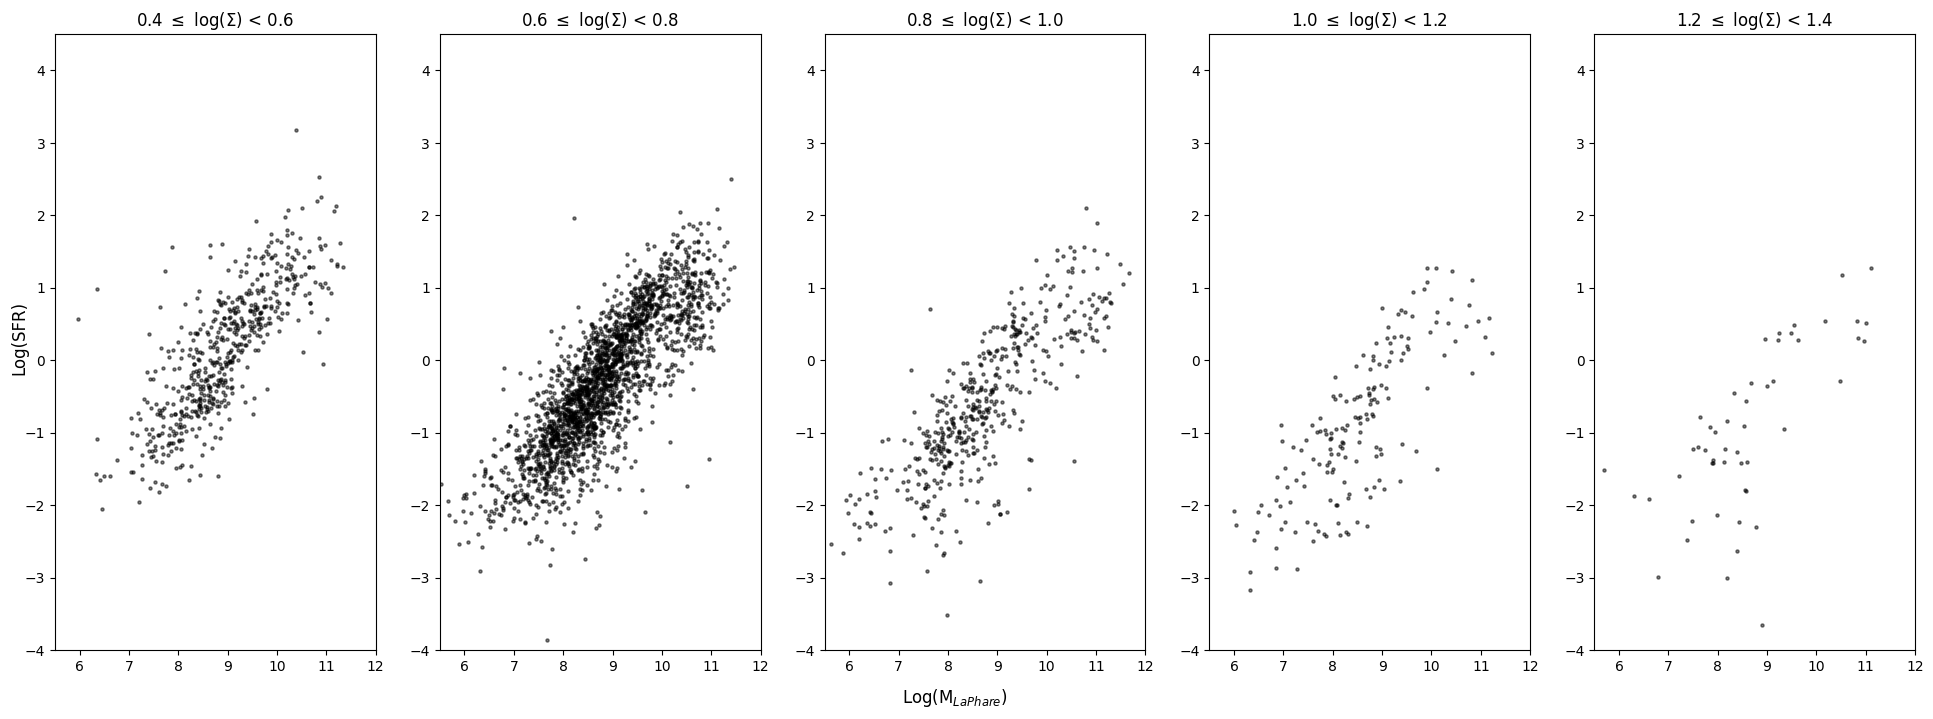

In [17]:
bins = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
fig, ax = plt.subplots(ncols = len(bins) - 1, figsize = (24,8))
for i in range(len(bins) - 1):
    
    df_tmp = df_environ.query('log_sigma >= @bins[@i] and log_sigma < @bins[@i+1]')
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_2',
            y = 'log_sfr_tot_2',
            title = f'{bins[i]} $\leq$ log($\Sigma$) < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [-4, 4.5],
            xlabel = '',
            ylabel = '',
            color = 'black',
            s = 5,
            alpha = 0.5
        )

fig.text(0.5, 0.05, 'Log(M$_{LaPhare}$)', ha='center', va='center', fontsize = 12)
fig.text(0.11, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

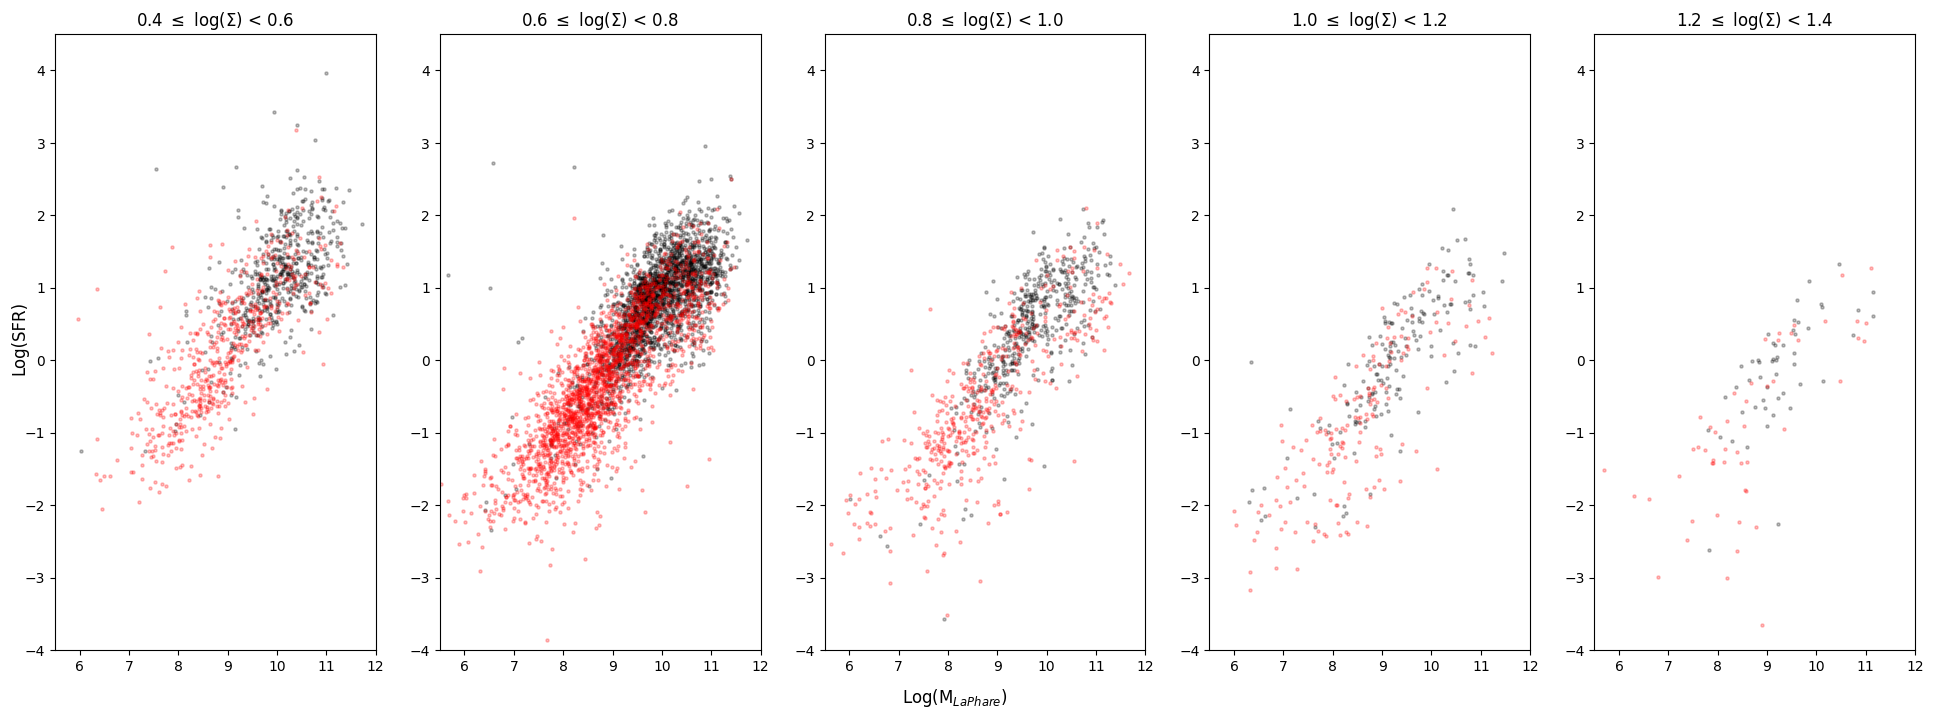

In [18]:
bins = [0.4, 0.6, 0.8, 1.0, 1.2, 1.4]
fig, ax = plt.subplots(ncols = len(bins) - 1, figsize = (24,8))
for i in range(len(bins) - 1):
    
    df_tmp = df_environ.query('log_sigma >= @bins[@i] and log_sigma < @bins[@i+1]')
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_1',
            y = 'log_sfr_tot_1',
            title = f'{bins[i]} $\leq$ log($\Sigma$) < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [-4, 4.5],
            xlabel = '',
            ylabel = '',
            color = 'black',
            s = 5,
            alpha = 0.25
        )
    
    df_tmp.plot.scatter(
            x = ['lp_mass_best_2'],
            y = 'log_sfr_tot_2',
            title = f'{bins[i]} $\leq$ log($\Sigma$) < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [-4, 4.5],
            xlabel = '',
            ylabel = '',
            color = 'red',
            s = 5,
            alpha = 0.25
        )

fig.text(0.5, 0.05, 'Log(M$_{LaPhare}$)', ha='center', va='center', fontsize = 12)
fig.text(0.11, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

In [19]:
df_environ.head()

,SourceID,separations,N_4,N_5,lp_mass_best_1,lp_mass_best_2,ez_z_phot_1,ez_z_phot_2,log_sfr_tot_1,log_sfr_tot_2,category,log_sigma
0,6000534883051,"[0.6236561709331763, 0.6715843835447213, 0.758...",3.479039,4.425517,10.58314,8.44760,0.723938,0.729505,1.132359,0.113969,stage1,0.593712
1,6000534883422,"[0.2951411361924966, 0.31058949037764166, 0.34...",5.523387,6.008943,9.41391,8.11594,0.422877,0.405269,0.292004,-1.455973,stage1,0.760502
3,6000535008523,"[0.03990060995032439, 0.23753658032854316, 0.2...",7.005301,7.229884,10.52583,10.61431,0.225256,0.221909,0.677104,-0.225291,stage1,0.852279
4,6000535064806,"[0.6242762467228179, 1.1249620013949815, 1.186...",3.171132,4.087778,9.08741,8.67995,1.091646,1.099990,0.709260,-0.046574,stage1,0.556351
5,6000535065335,"[0.10432518121349929, 0.16401788963322447, 0.1...",7.210302,8.060377,8.96196,8.51390,0.206150,0.203365,-0.234076,-1.280100,stage4,0.882154


In [20]:
df_environ.log_sigma.max()

2.191948173039744

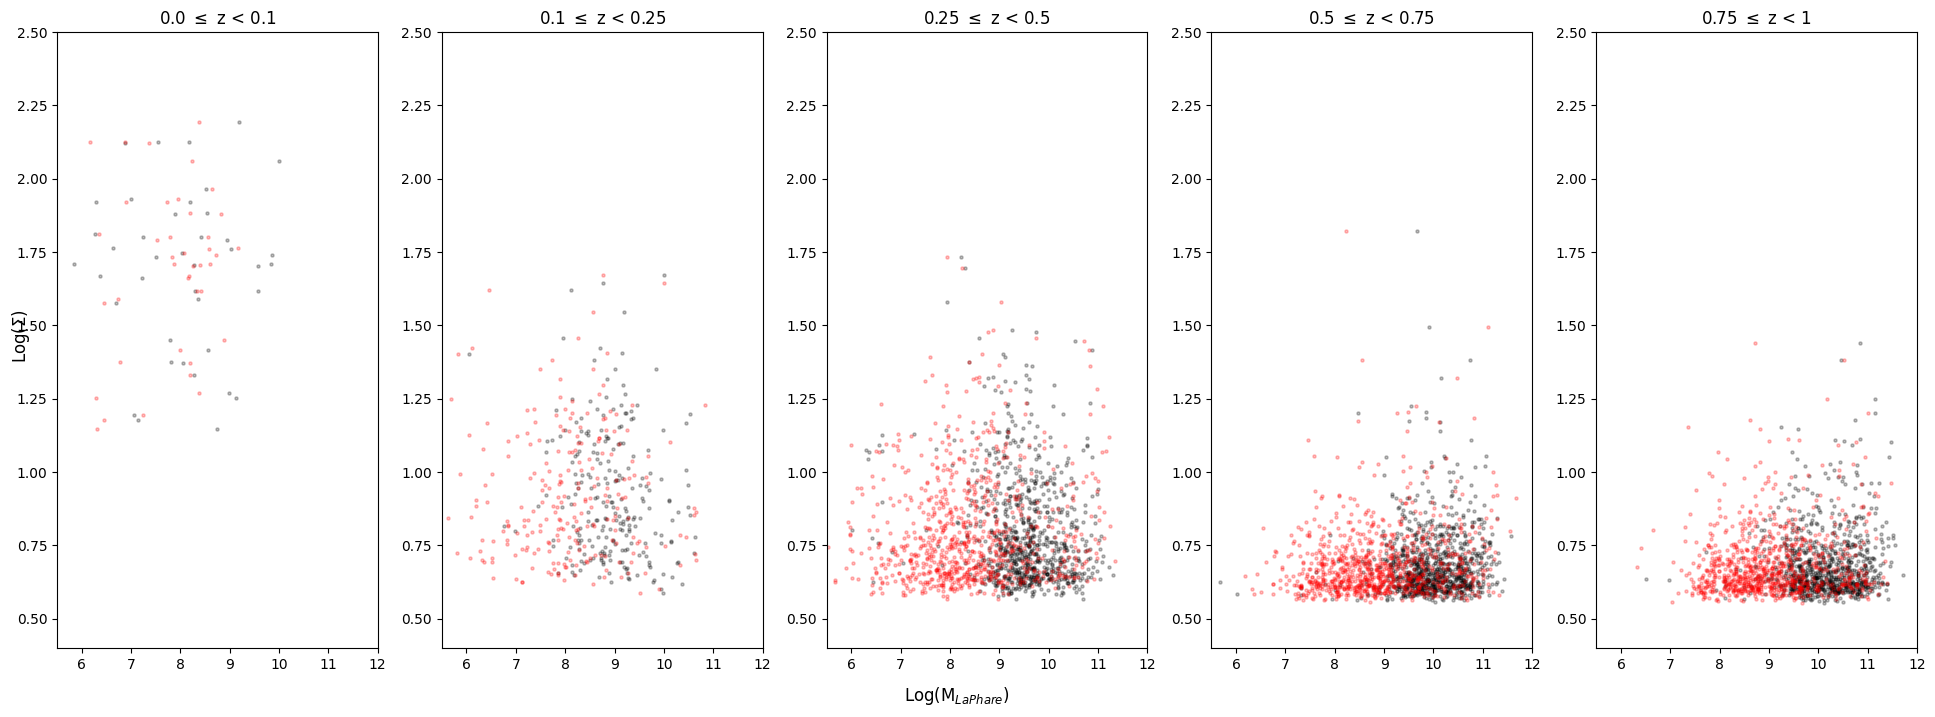

In [21]:
bins = [0.0, 0.1, 0.25, 0.5, 0.75, 1]
fig, ax = plt.subplots(ncols = len(bins) - 1, figsize = (24,8))
for i in range(len(bins) - 1):
    
    df_tmp = df_environ.query('ez_z_phot_1 >= @bins[@i] and ez_z_phot_1 < @bins[@i+1]')
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_1',
            y = 'log_sigma',
            title = f'{bins[i]} $\leq$ z < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [0.4, 2.5],
            xlabel = '',
            ylabel = '',
            color = 'black',
            s = 5,
            alpha = 0.25
        )
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_2',
            y = 'log_sigma',
            title = f'{bins[i]} $\leq$ z < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [0.4, 2.5],
            xlabel = '',
            ylabel = '',
            color = 'red',
            s = 5,
            alpha = 0.25
        )

fig.text(0.5, 0.05, 'Log(M$_{LaPhare}$)', ha='center', va='center', fontsize = 12)
fig.text(0.11, 0.5, 'Log($\Sigma$)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

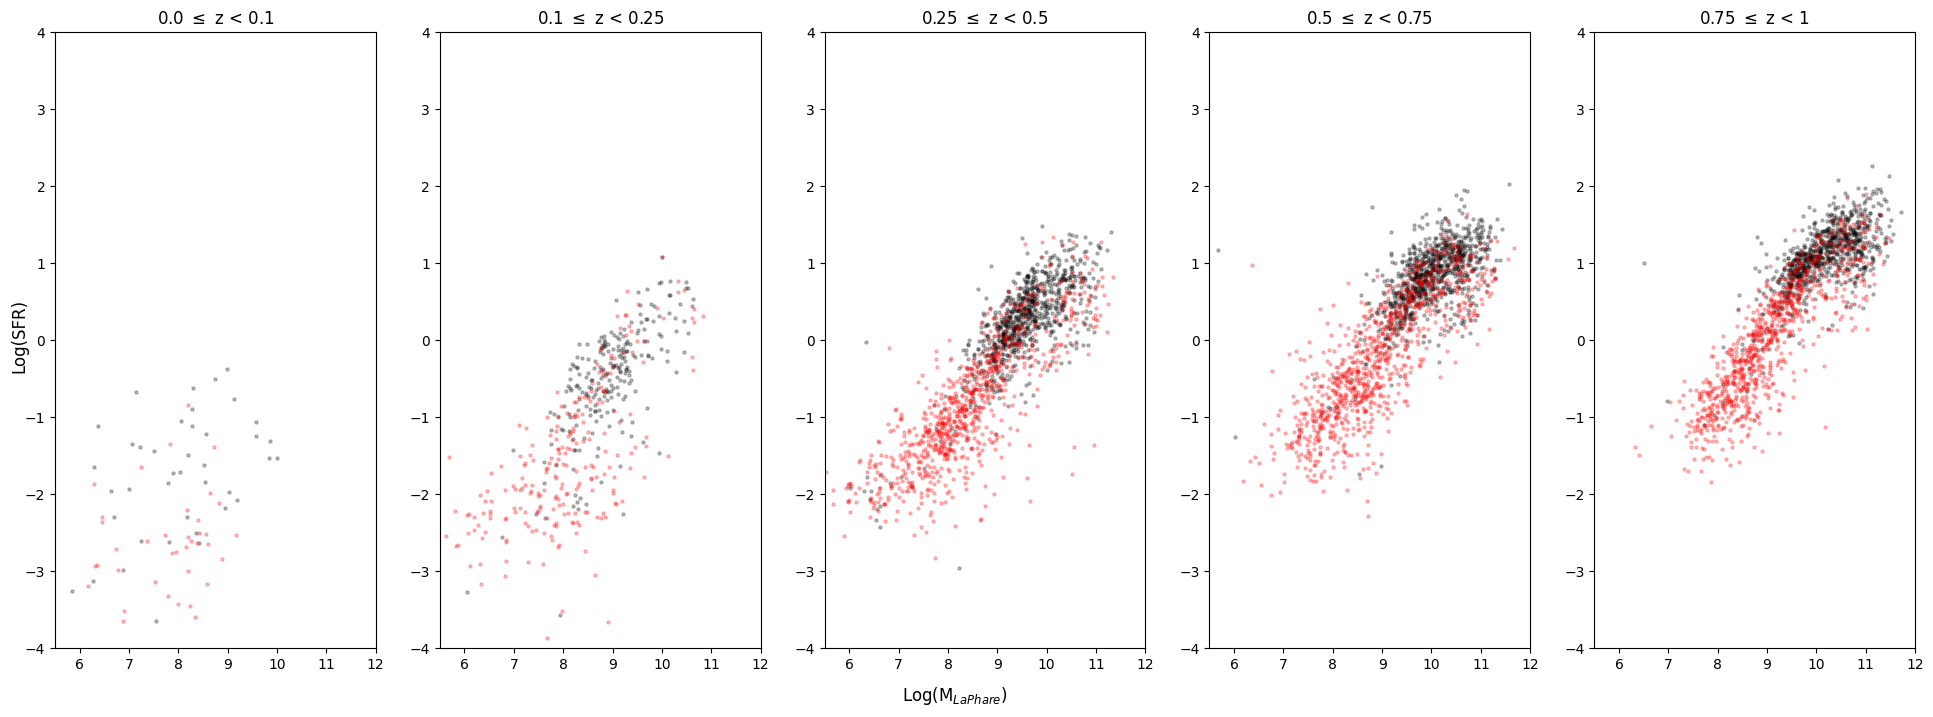

In [22]:
bins = [0.0, 0.1, 0.25, 0.5, 0.75, 1]
fig, ax = plt.subplots(ncols = len(bins) - 1, figsize = (24,8))
for i in range(len(bins) - 1):
    
    df_tmp = df_environ.query('ez_z_phot_1 >= @bins[@i] and ez_z_phot_1 < @bins[@i+1]')
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_1',
            y = 'log_sfr_tot_1',
            title = f'{bins[i]} $\leq$ z < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [-4, 4],
            xlabel = '',
            ylabel = '',
            color = 'black',
            s = 5,
            alpha = 0.25
        )
    
    df_tmp.plot.scatter(
            x = 'lp_mass_best_2',
            y = 'log_sfr_tot_2',
            title = f'{bins[i]} $\leq$ z < {bins[i+1]}',
            ax = ax[i],
            xlim = [5.5, 12],
            ylim = [-4, 4],
            xlabel = '',
            ylabel = '',
            color = 'red',
            s = 5,
            alpha = 0.25
        )

fig.text(0.5, 0.05, 'Log(M$_{LaPhare}$)', ha='center', va='center', fontsize = 12)
fig.text(0.11, 0.5, 'Log(SFR)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

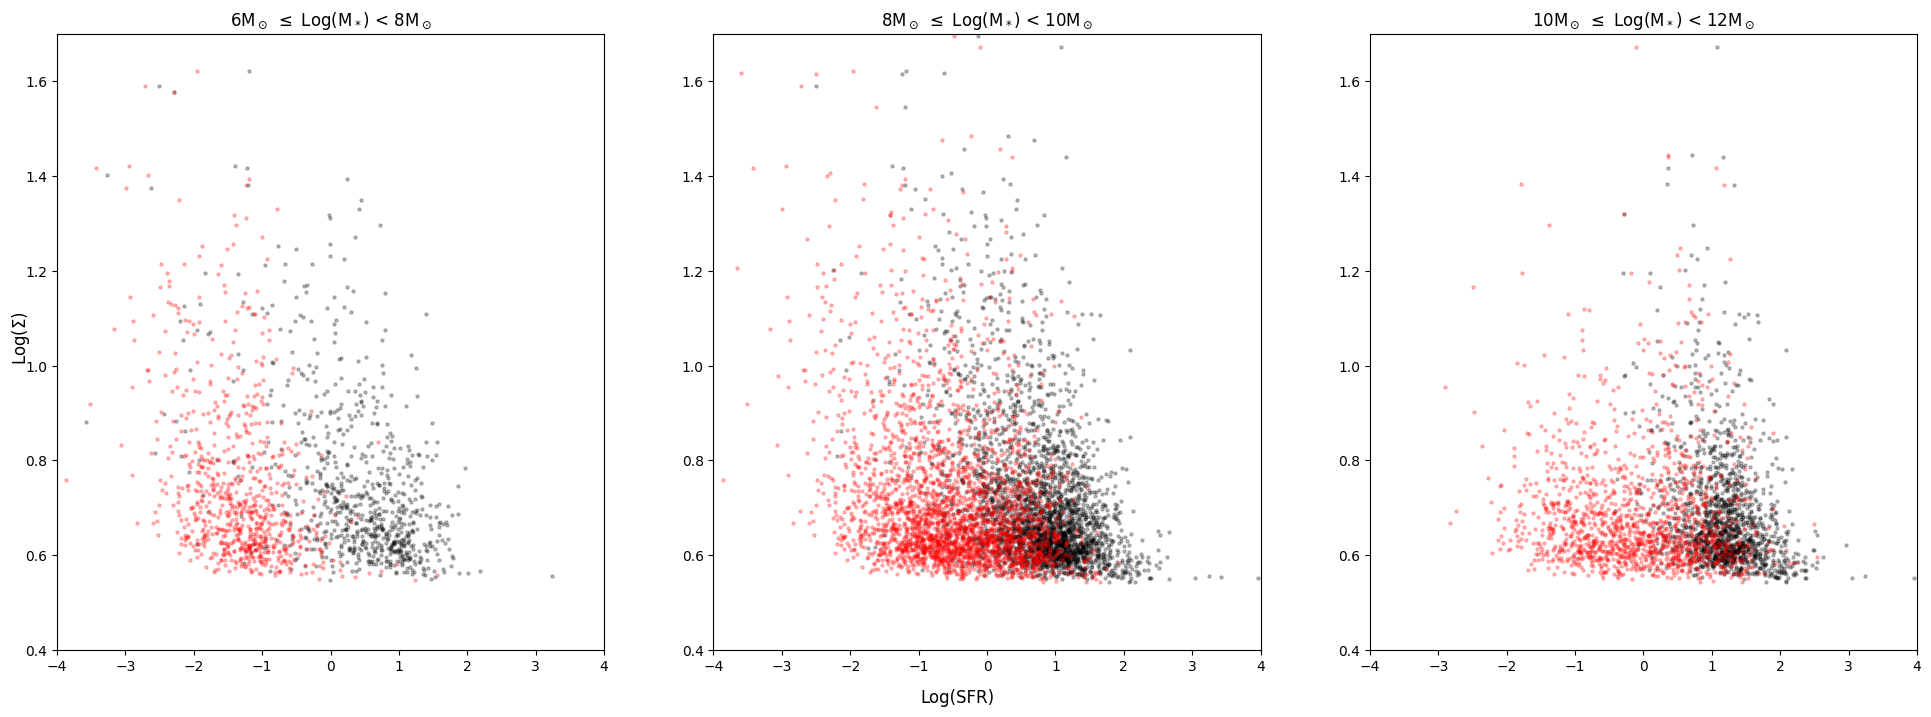

In [23]:
bins = [6, 8, 10, 12]
fig, ax = plt.subplots(ncols = len(bins) - 1, figsize = (24,8))
for i in range(len(bins) - 1):
    
    df_tmp = df_environ.query('lp_mass_best_1 >= @bins[@i] and lp_mass_best_2 < @bins[@i+1]')
    
    df_tmp.plot.scatter(
            x = 'log_sfr_tot_1',
            y = 'log_sigma',
            title = f'{bins[i]} $\leq$ Log(M$_*$) < {bins[i+1]}',
            ax = ax[i],
            ylim = [5.5, 12],
            xlim = [-4, 4],
            xlabel = '',
            ylabel = '',
            color = 'black',
            s = 5,
            alpha = 0.25
        )
    
    df_tmp.plot.scatter(
            x = 'log_sfr_tot_2',
            y = 'log_sigma',
            title = f'{bins[i]}M$_\odot$ $\leq$ Log(M$_*$) < {bins[i+1]}M$_\odot$',
            ax = ax[i],
            ylim = [0.4, 1.7],
            xlim = [-4, 4],
            xlabel = '',
            ylabel = '',
            color = 'red',
            s = 5,
            alpha = 0.25
        )

fig.text(0.5, 0.05, 'Log(SFR)', ha='center', va='center', fontsize = 12)
fig.text(0.11, 0.5, 'Log($\Sigma$)', ha='center', va='center', rotation='vertical', fontsize = 12)
plt.show()

In [24]:
n_neighbour.separations.iloc[0]

'[0.6236561709331763, 0.6715843835447213, 0.7582628704926255, 0.8151540158951343, 0.8649011518390204]'

In [25]:
df_seps = (
    n_neighbour
    .assign(sep = n_neighbour.separations.apply(lambda x: ast.literal_eval(x)[0]))
    .assign(log_sigma = n_neighbour.apply(lambda row: (np.log10(row.N_4) + np.log10(row.N_5)) / 2, axis = 1))
)

In [26]:
df_seps

,index,IDs,separations,N_1,N_2,N_3,N_4,N_5,sep,log_sigma
0,6000534883051,"[692814, 687870, 747469, 737019, 683089]","[0.6236561709331763, 0.6715843835447213, 0.758...",0.818389,1.705747,2.553618,3.479039,4.425517,0.623656,0.593712
1,6000534883422,"[733042, 726581, 752574, 752669, 763999]","[0.2951411361924966, 0.31058949037764166, 0.34...",3.654186,4.299716,4.638929,5.523387,6.008943,0.295141,0.760502
2,6000534884369,"[821176, 838185, 818008, 846121, 815527]","[0.17313672328295357, 0.17426398202835064, 0.2...",10.618709,11.481776,9.596135,6.023128,5.915822,0.173137,0.775919
3,6000535008523,"[1015737, 1010878, 990161, 1026898, 990592]","[0.03990060995032439, 0.23753658032854316, 0.2...",199.936027,6.641429,6.890354,7.005301,7.229884,0.039901,0.852279
4,6000535064806,"[1026721, 1055516, 1038037, 996612, 992724]","[0.6242762467228179, 1.1249620013949815, 1.186...",0.816764,1.251521,2.225972,3.171132,4.087778,0.624276,0.556351
...,...,...,...,...,...,...,...,...,...,...
495,6000534268545,"[1086854, 1106070, 1124443, 1114369, 1101442]","[0.40609336390967893, 0.46205863890334914, 0.5...",1.930182,2.490925,3.215592,4.124541,5.065759,0.406093,0.660010
496,6000534269114,"[1154299, 1148720, 1157358, 1166005, 1150314]","[0.07100014765990462, 0.08615865266844906, 0.0...",63.143932,43.879758,40.854956,8.940849,8.684749,0.071000,0.945068
497,6000534269121,"[1146768, 1155927, 1156187, 1161748, 1159370]","[0.13893391297575627, 0.2876129348857539, 0.31...",16.490491,4.847984,5.115697,5.394013,5.951637,0.138934,0.753274
498,6000534269352,"[1157261, 1150179, 1186392, 1169844, 1166800]","[0.2263986929193921, 0.3156195277166816, 0.316...",6.210153,4.195379,5.170339,6.124170,6.759129,0.226399,0.808469


<AxesSubplot:xlabel='Separations (Mpc)', ylabel='Log($\\Sigma$ Mpc$^2$)'>

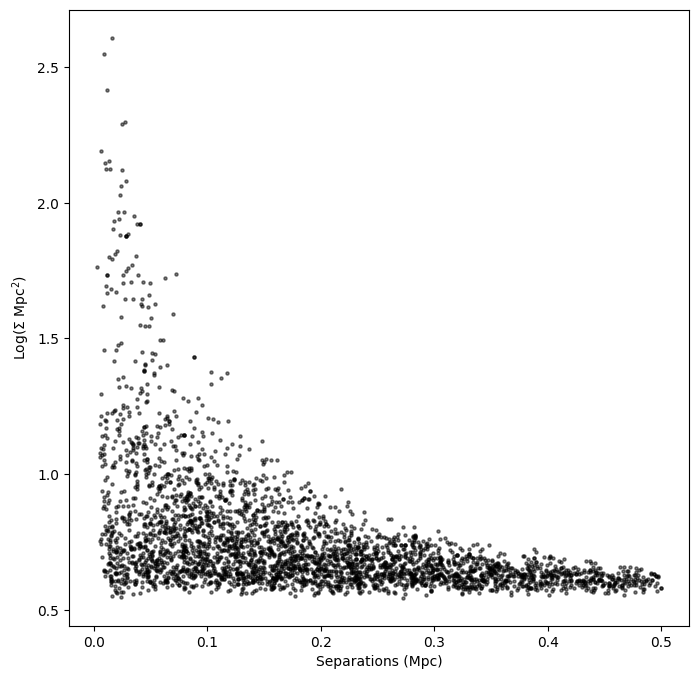

In [27]:
df_seps.query('sep <= 0.5').plot.scatter(
    x = 'sep',
    y = 'log_sigma',
    color = 'black',
    alpha = 0.5,
    s = 5,
    ylabel = 'Log($\Sigma$ Mpc$^2$)',
    xlabel = 'Separations (Mpc)',
    figsize = (8,8)
)

In [28]:
df_seps.query('sep < 0.5')

,index,IDs,separations,N_1,N_2,N_3,N_4,N_5,sep,log_sigma
1,6000534883422,"[733042, 726581, 752574, 752669, 763999]","[0.2951411361924966, 0.31058949037764166, 0.34...",3.654186,4.299716,4.638929,5.523387,6.008943,0.295141,0.760502
2,6000534884369,"[821176, 838185, 818008, 846121, 815527]","[0.17313672328295357, 0.17426398202835064, 0.2...",10.618709,11.481776,9.596135,6.023128,5.915822,0.173137,0.775919
3,6000535008523,"[1015737, 1010878, 990161, 1026898, 990592]","[0.03990060995032439, 0.23753658032854316, 0.2...",199.936027,6.641429,6.890354,7.005301,7.229884,0.039901,0.852279
5,6000535065335,"[1086030, 1092509, 1091322, 1060263, 1067454]","[0.10432518121349929, 0.16401788963322447, 0.1...",29.246361,12.832260,11.913802,7.210302,8.060377,0.104325,0.882154
6,6000535065456,"[1095990, 1082467, 1087607, 1091599, 1107107]","[0.03818475111290117, 0.1005169822026542, 0.12...",218.308275,32.504402,21.068705,18.010068,17.332271,0.038185,1.247185
...,...,...,...,...,...,...,...,...,...,...
495,6000534268545,"[1086854, 1106070, 1124443, 1114369, 1101442]","[0.40609336390967893, 0.46205863890334914, 0.5...",1.930182,2.490925,3.215592,4.124541,5.065759,0.406093,0.660010
496,6000534269114,"[1154299, 1148720, 1157358, 1166005, 1150314]","[0.07100014765990462, 0.08615865266844906, 0.0...",63.143932,43.879758,40.854956,8.940849,8.684749,0.071000,0.945068
497,6000534269121,"[1146768, 1155927, 1156187, 1161748, 1159370]","[0.13893391297575627, 0.2876129348857539, 0.31...",16.490491,4.847984,5.115697,5.394013,5.951637,0.138934,0.753274
498,6000534269352,"[1157261, 1150179, 1186392, 1169844, 1166800]","[0.2263986929193921, 0.3156195277166816, 0.316...",6.210153,4.195379,5.170339,6.124170,6.759129,0.226399,0.808469
